In [2]:
import pandas as pd
from neuralNetworkFromScratch import NeuralNetworkFromScratch
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple multiple classification

In [4]:
data = load_wine()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['class'])
df = pd.concat([features, target], axis=1)

In [5]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [6]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [7]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 4, 2, 3], task='multiple_classification', learning_rate=1e-2, n_epochs=10000, print_cost=True)

Cost after iteration 0: 4.200906434122763
Cost after iteration 1000: 5.237828700031526
Cost after iteration 2000: 5.534916978950683
Cost after iteration 3000: 5.721056760007139
Cost after iteration 4000: 5.85610927986441
Cost after iteration 5000: 5.961693564818506
Cost after iteration 6000: 6.048127769255879
Cost after iteration 7000: 6.121141463201464
Cost after iteration 8000: 6.184242798238461
Cost after iteration 9000: 6.239733271730537
Cost after iteration 9999: 6.28915577081129


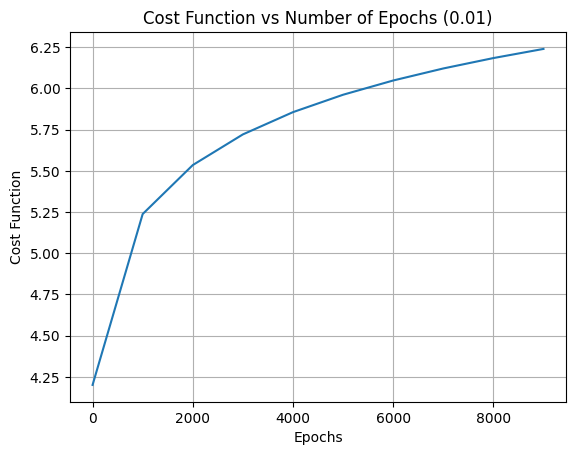

In [8]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [9]:
pred_train = model.predict(train_x, train_y)

In [10]:
pred = model.predict(test_x, test_y)

In [71]:
Z = np.random.uniform(0,1e1, 5)

In [81]:
# softmax
sum_exp = np.exp(Z).sum()
A = np.exp(Z) / sum_exp
A

array([1.16531738e-03, 9.12801903e-01, 3.37681667e-02, 1.12076562e-04,
       5.21525363e-02])